# Charger Reliability Problem

## Data 

In [2]:
import pandas as pd

## Stations Overview

In [5]:
df_stations = pd.read_csv("data/stations/stations_overview.csv")

In [7]:
df_stations.columns

Index(['Station Name', 'Org Name', 'MAC Address', 'System S/N', 'Address 1',
       'Address 2', 'Floor Label', 'City', 'State', 'Zip/Postal Code',
       'County', 'Country ', 'Activation Status', 'Network Status',
       'Station Status', 'Port 1 Status', 'Port 2 Status', 'No. of Ports',
       'Pricing Policy Name', 'Reservations', 'Station Message', 'Enabled',
       'Station Activation Type', 'Usable By',
       'Visibility (Access Policy Name)', 'Radio Group Name',
       'Customer Category', 'Customer Subcategory', 'Circuit Sharing',
       'Currency Name', 'Power Select / AC Breaker Rating',
       'Scheduled Charging Policy Name', 'Warranty', 'Station Activation Date',
       'Warranty Expiration Date', 'Warranty Service',
       'Device Access Restriction', 'Waitlist Policy Name', 'Asset Tag ID',
       'Meter ID', 'Service Delivery Point ID', 'Point of Service ID',
       'Account ID', 'Circuit ID', 'Panel ID', 'Customer Name', 'Customer ID',
       'Site Validation Status',

In [94]:
print('Number of stations:')
print(df_stations['Station Name'].nunique())
print('Cities:')
print(df_stations['City'].unique())
print('Number of Parking lots: ')
print(df_stations['Address 1'].nunique())
print('Counties:')
print(df_stations['County'].unique())
print('Network Status:')
print(df_stations['Network Status'].unique())
print('Station Status:')
print(df_stations['Station Status'].unique())
print('Number of ports:')
print(df_stations['No. of Ports'].value_counts())
print('Pricing Policy:')
print(df_stations['Pricing Policy Name'].value_counts())


Number of stations:
109
Cities:
['Stanford' 'Menlo Park' 'Palo Alto' 'Redwood City']
Number of Parking lots: 
20
Counties:
['Santa Clara County' nan 'San Mateo County']
Network Status:
['Unreachable' 'Reachable']
Station Status:
['Watch List' 'Available' 'Inuse' 'Needs Service']
Number of ports:
No. of Ports
2    96
1    13
Name: count, dtype: int64
Pricing Policy:
Pricing Policy Name
$1 per hr enforcement hours                           89
$2 per hr enforcement hours $1 per hr otherwise (e    19
Stanford University Mirrored                           1
Name: count, dtype: int64


In [127]:
print(df_stations['Customer Category'].value_counts())
print(df_stations['Customer Subcategory'].value_counts())
print(df_stations['Circuit Sharing'].value_counts())
print(df_stations['Power Select / AC Breaker Rating'].value_counts())

Customer Category
Education    96
Workplace    13
Name: count, dtype: int64
Customer Subcategory
University / College    96
General                 13
Name: count, dtype: int64
Circuit Sharing
Disabled    74
Enabled     35
Name: count, dtype: int64
Power Select / AC Breaker Rating
40A    89
30A     3
Name: count, dtype: int64


In [128]:
print(df_stations['Customer Name'].value_counts())
print(df_stations['Warranty'].value_counts())
print(df_stations['Site Validation Status'].value_counts())

Customer Name
Stanford Parking & Transportation Services                        6
ABM Electrical & Lighting Solutions, LLC (SoCal)                  4
The Board of Trustees of The Leland Stanford Junior University    4
Stanford University                                               3
Oak Park Unified School District                                  1
Name: count, dtype: int64
Warranty
ChargePoint Assure    76
Standard Warranty     33
Name: count, dtype: int64
Site Validation Status
Validated        91
Not Validated    18
Name: count, dtype: int64


In [129]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Station Name                      109 non-null    object 
 1   Org Name                          109 non-null    object 
 2   MAC Address                       109 non-null    object 
 3   System S/N                        109 non-null    int64  
 4   Address 1                         109 non-null    object 
 5   Address 2                         1 non-null      object 
 6   Floor Label                       26 non-null     object 
 7   City                              109 non-null    object 
 8   State                             109 non-null    object 
 9   Zip/Postal Code                   109 non-null    int64  
 10  County                            104 non-null    object 
 11  Country                           109 non-null    object 
 12  Activati

## Alarms

In [188]:
df_alarms = pd.read_csv('data/reports/alarms/alarms.csv')
df_alarms['Alarm Time'] = df_alarms['Alarm Time'].str.replace(' (PDT)', '')
df_alarms['Alarm Time'] = pd.to_datetime(df_alarms['Alarm Time']).dt.tz_localize('America/Los_Angeles')

In [201]:
df_alarms.columns

Index(['Display Name', 'MAC Address', 'Org Name', 'Alarm Severity',
       'Alarm Name', 'Alarm ID', 'FRU Name', 'Alarm Time', 'Model Number',
       'Port', 'Reason For Clearing', 'Component Serial Number'],
      dtype='object')

## Logs Overview

In [205]:
print(df_alarms['Display Name'].value_counts())

Display Name
STANFORD / STATION 1 TMU    5297
ROBLE / ROBLE LL2-1         2330
SRWC / RWC L5 3             1816
SRWC / RWC L2 2             1540
STANFORD / CAM 5 LL1        1303
                            ... 
STANFORD / STATION 6          17
STANFORD / STATION 10         15
SRWC / RWC B1 4               11
SRWC / RWC B1 2               11
SRWC / RWC B1 1               11
Name: count, Length: 104, dtype: int64


<Axes: >

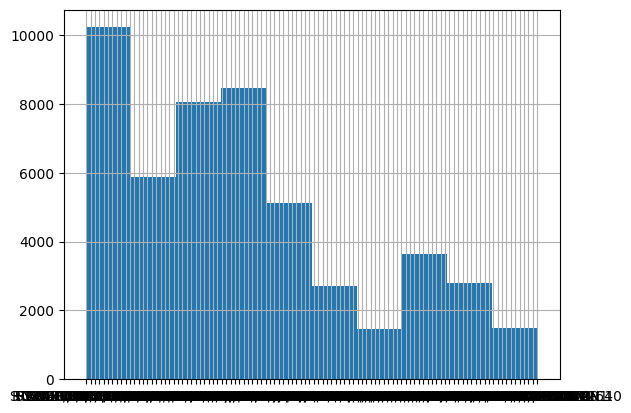

In [209]:
df_alarms['Display Name'].hist()